In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import LPR
#https://youtu.be/9dyaI3GyUtc?si=p2ld13VfrY6RH7pi

In [4]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [5]:
idx = 7
lpr = LPR.LPR()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


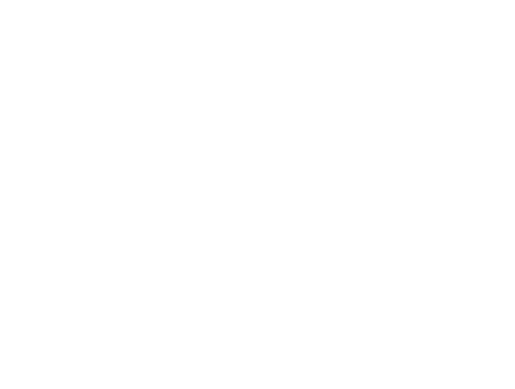

In [6]:
img = cv2.imread(f"./imgs/{idx:03}.png")
plot_image(img, False)

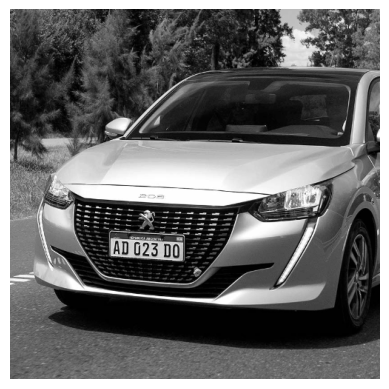

In [ ]:
gray = lpr.grayscale(img)
plot_image(gray)

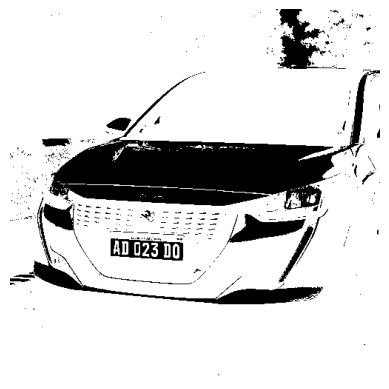

In [ ]:
thresh = lpr.apply_threshold(gray)
plot_image(thresh)

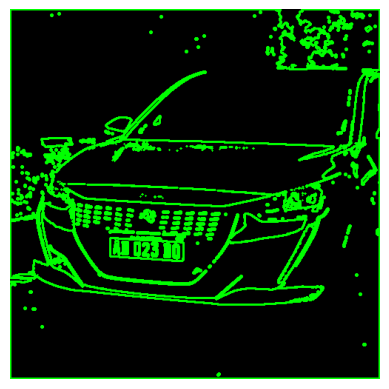

In [ ]:
contours = lpr.find_contours(thresh)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

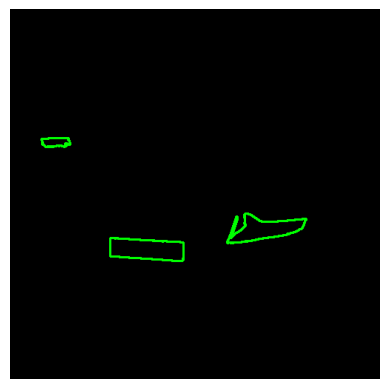

In [ ]:
candidates = lpr.filter_candidates(contours)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

[[[135 310]]

 [[136 309]]

 [[141 309]]

 [[142 310]]

 [[143 309]]

 [[145 309]]

 [[146 310]]

 [[160 310]]

 [[161 311]]

 [[175 311]]

 [[176 312]]

 [[192 312]]

 [[193 313]]

 [[194 312]]

 [[195 313]]

 [[205 313]]

 [[206 314]]

 [[207 313]]

 [[211 313]]

 [[212 314]]

 [[229 314]]

 [[230 315]]

 [[233 315]]

 [[234 316]]

 [[234 336]]

 [[233 337]]

 [[234 338]]

 [[232 340]]

 [[219 340]]

 [[218 339]]

 [[206 339]]

 [[205 338]]

 [[192 338]]

 [[191 337]]

 [[177 337]]

 [[176 336]]

 [[161 336]]

 [[160 335]]

 [[148 335]]

 [[147 334]]

 [[136 334]]

 [[135 333]]]


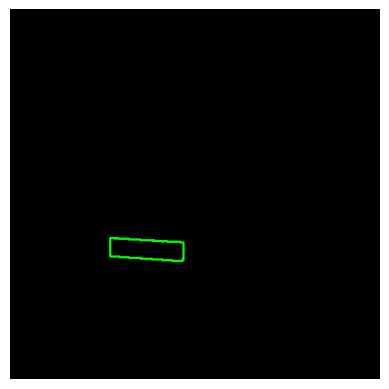

In [ ]:
license = lpr.get_lowest_candidate(candidates)
print(license)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

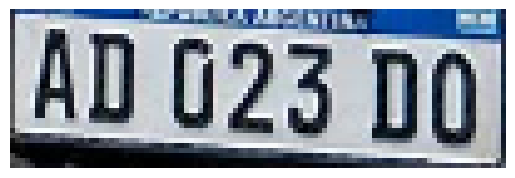

In [ ]:
cropped = lpr.crop_license_plate(gray, license)
cropped2 = lpr.crop_license_plate(img, license)
plot_image(cropped2, False)

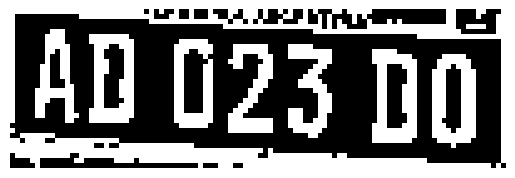

In [ ]:
thresh_cropped = lpr.apply_adaptive_threshold(cropped)
plot_image(thresh_cropped)

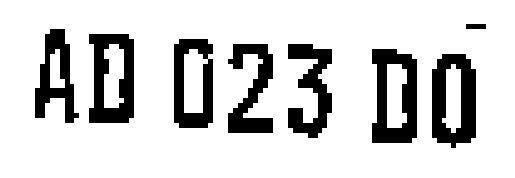

In [ ]:
clear_border = lpr.clear_border(thresh_cropped)
final = lpr.invert_image(clear_border)
plot_image(final)